**Setup environment and import necessary libraries**

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


**Load and preprocess the MNIST dataset**

In [3]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the images to a range of 0 to 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape the data to fit the model input
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


**Define the CNN model architecture**

In [4]:
def build_cnn_model():
    model = models.Sequential()

    # First Convolutional Layer (32 filters, kernel size 3x3)
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

    # First MaxPooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # Second Convolutional Layer (64 filters, kernel size 3x3)
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # Second MaxPooling Layer
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the output from convolution layers
    model.add(layers.Flatten())

    # Fully Connected Layer (Dense Layer with 128 units)
    model.add(layers.Dense(128, activation='relu'))

    # Output Layer with 10 units (for 10 classes in MNIST)
    model.add(layers.Dense(10, activation='softmax'))

    return model


**Compile the model**


In [5]:
def compile_model(model):
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


**Train the model and report F1 score**

In [6]:
def train_model(model, x_train, y_train, x_test, y_test):
    # Train the model for 5 epochs with a batch size of 64
    history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

    # Evaluate the model performance on test set
    test_loss, test_accuracy = model.evaluate(x_test, y_test)

    # Predict the class labels on the test set
    y_pred = model.predict(x_test)
    y_pred = np.argmax(y_pred, axis=1)
    y_test_true = np.argmax(y_test, axis=1)

    # Classification report including F1 score
    print("Classification Report:\n", classification_report(y_test_true, y_pred))

    # Return the history and final evaluation
    return history, test_loss, test_accuracy


**Visual Representation of the Training and Validation Metrics**

In [7]:
def plot_training_results(history):
    # Plotting the accuracy and loss curves
    plt.figure(figsize=(12, 6))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()


**Building Part**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8922 - loss: 0.3709 - val_accuracy: 0.9859 - val_loss: 0.0463
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9842 - loss: 0.0530 - val_accuracy: 0.9854 - val_loss: 0.0456
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9886 - loss: 0.0364 - val_accuracy: 0.9892 - val_loss: 0.0337
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9919 - loss: 0.0248 - val_accuracy: 0.9914 - val_loss: 0.0263
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9946 - loss: 0.0172 - val_accuracy: 0.9865 - val_loss: 0.0411
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9840 - loss: 0.0495
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.95      1.00      0.98      1032
       

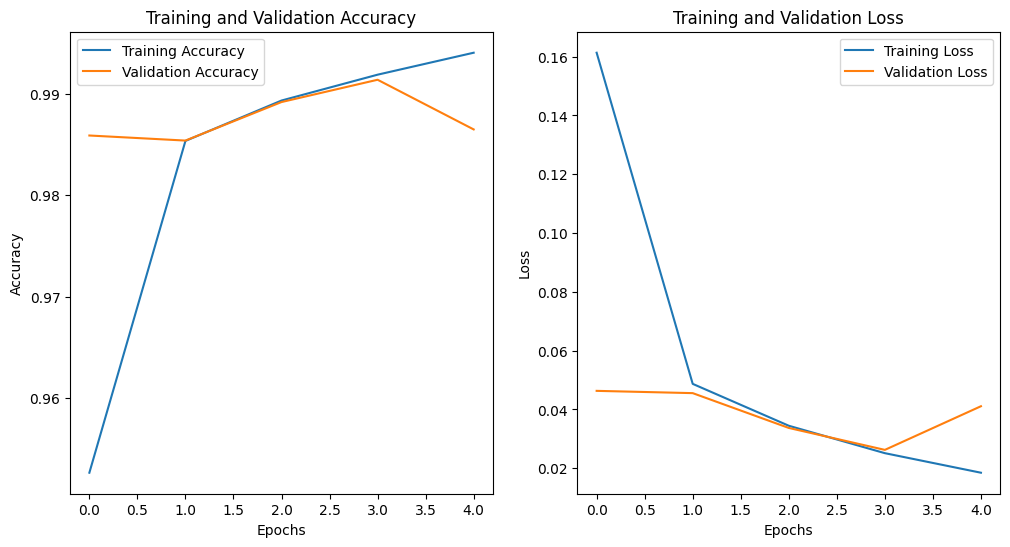

In [8]:

# Step 1: Build the model
model = build_cnn_model()

# Step 2: Compile the model
model = compile_model(model)

# Step 3: Train the model and get the F1 score
history, test_loss, test_accuracy = train_model(model, x_train, y_train, x_test, y_test)

# Step 4: Visualize the training process
plot_training_results(history)


In [9]:
model.save('mnist_cnn_model.h5')